In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from datasets.prostate import X_train, y_train

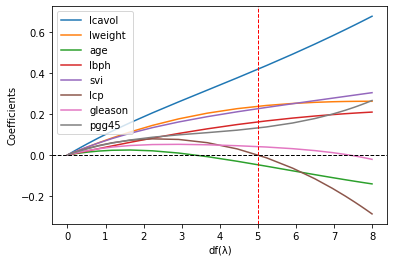

In [2]:
data = []
df = []
d2 = np.power(np.linalg.svd(X_train)[1], 2)

for alpha in np.logspace(-5, 5):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    data.append(reg.coef_)
    df.append((d2 / (d2 + alpha)).sum())

ax = pd.DataFrame(
    data=data, index=df, columns=X_train.columns,
).plot()
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.axvline(x=5, color='red', linestyle='--', linewidth=1)
ax.set_xlabel("df(λ)")
ax.set_ylabel("Coefficients");